#### Os dados, até a data do presente estudo, estão no https://covid.saude.gov.br/
#### O presente arquivo é de 4 de novembro. Atenção: de acordo com o dia em que for feita a análise, a última barra da totalização por semana estará menor.
#### Disclaimer/Aviso Legal: Este notebook tem um fim única e exclusivamente didático, para alunos da FATEC, como uma introdução à Análise de Dados Públicos. Desse modo, está excluída a garantia ou responsabilidade de qualquer tipo, por exemplo, de precisão, confiabilidade, completude e atualidade das informações.

In [1]:
import pandas as pd
low_memory=False
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [2]:
filename = r'C:\Users\fmasa\Downloads\HIST_PAINEL_COVIDBR_04nov2020.csv'
df = pd.read_csv(filename, delimiter=';',
                 error_bad_lines=False)

In [3]:
df.shape

(1253905, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253905 entries, 0 to 1253904
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   regiao                  1253905 non-null  object 
 1   estado                  1253651 non-null  object 
 2   municipio               1242110 non-null  object 
 3   coduf                   1253905 non-null  int64  
 4   codmun                  1246793 non-null  float64
 5   codRegiaoSaude          1242110 non-null  float64
 6   nomeRegiaoSaude         1242110 non-null  object 
 7   data                    1253905 non-null  object 
 8   semanaEpi               1253905 non-null  int64  
 9   populacaoTCU2019        1249222 non-null  float64
 10  casosAcumulado          1253905 non-null  int64  
 11  casosNovos              1253905 non-null  int64  
 12  obitosAcumulado         1253905 non-null  int64  
 13  obitosNovos             1253905 non-null  int64  
 14  Re

In [5]:
df.sample(10)

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
874357,Sudeste,SP,Tejupá,35,355420.0,35061.0,VALE DO JURUMIRIM,2020-11-03,45,4532.0,28,0,0,0,NaN,NaN,0.0
1038469,Sul,RS,NaN,43,430000.0,NaN,NaN,2020-10-18,43,NaN,0,0,0,0,NaN,NaN,NaN
661106,Sudeste,MG,Santa Margarida,31,315790.0,31059.0,MANHUACU,2020-09-01,36,16208.0,116,4,2,0,NaN,NaN,0.0
3029,Nordeste,RN,NaN,24,NaN,NaN,NaN,2020-10-17,42,3506853.0,76849,189,2551,4,NaN,NaN,NaN
252225,Nordeste,RN,Bodó,24,240165.0,24004.0,4ª REGIAO DE SAUDE - CAICO,2020-05-02,18,2223.0,0,0,0,0,NaN,NaN,0.0
990216,Sul,SC,Dionísio Cerqueira,42,420500.0,42001.0,EXTREMO OESTE,2020-07-25,30,15498.0,44,0,3,0,NaN,NaN,0.0
357335,Nordeste,PE,Lagoa do Carro,26,260845.0,26006.0,LIMOEIRO,2020-07-18,29,18071.0,76,4,10,0,NaN,NaN,0.0
893990,Sul,PR,Cafezal do Sul,41,410347.0,41012.0,12ª RS UMUARAMA,2020-04-03,14,4044.0,0,0,0,0,NaN,NaN,0.0
928613,Sul,PR,Maria Helena,41,411470.0,41012.0,12ª RS UMUARAMA,2020-05-31,23,5677.0,12,0,0,0,NaN,NaN,0.0
790966,Sudeste,SP,Ilhabela,35,352040.0,35173.0,LITORAL NORTE,2020-04-05,15,34970.0,0,0,0,0,NaN,NaN,0.0


In [21]:
df.groupby('estado')['obitosAcumulado'].max().sort_values(ascending=False)

estado
SP    39549
RJ    20759
CE     9370
MG     9069
PE     8667
BA     7711
PA     6767
RS     5903
GO     5797
PR     5269
AM     4588
MA     4091
ES     3884
MT     3828
DF     3719
SC     3163
PB     3130
RN     2588
PI     2441
AL     2254
SE     2228
MS     1622
RO     1464
TO     1105
AP      751
AC      696
RR      693
Name: obitosAcumulado, dtype: int64

<AxesSubplot:ylabel='estado'>

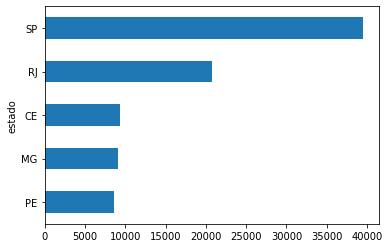

In [22]:
df.groupby('estado')['obitosAcumulado'].max().sort_values().tail(5).plot(kind='barh')

<AxesSubplot:xlabel='data'>

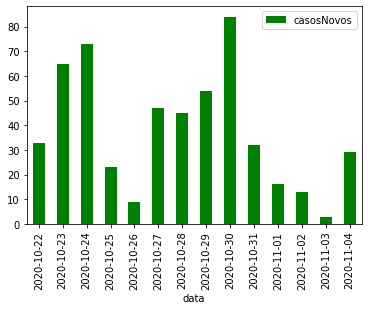

In [6]:
sjc = df.query('municipio == "São José dos Campos"')
sjc.tail(14).plot(kind='bar', 
        x='data', y='casosNovos', color='GREEN')

<AxesSubplot:xlabel='semanaEpi'>

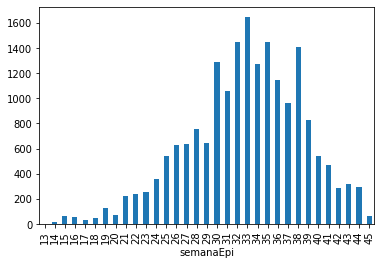

In [7]:
sjc.groupby('semanaEpi')['casosNovos'].sum().plot(kind='bar')

<AxesSubplot:xlabel='data'>

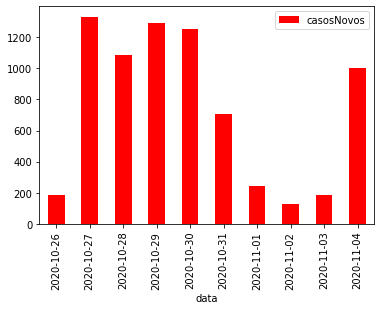

In [8]:
sp = df.query('municipio == "São Paulo"')
sp.tail(10).plot(kind='bar', 
        x='data', y='casosNovos', color='RED')

<AxesSubplot:xlabel='semanaEpi'>

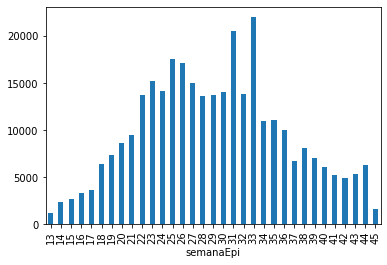

In [9]:
sp.groupby('semanaEpi')['casosNovos'].sum().plot(kind='bar')